#  I. Its time to get real

Lets try out our classification algorithms a few real datasets.  In this notebook you will re-use snippets of your code from the classification and cross-validation layer 1 notebooks to perform classification on real datasets.   

------
This isn't a notebook you just read - you'll need to complete several coding portions of it (either individually or in groups) and think about the questions posed herein in order to build up your intuitive understanding of these algorithms, as well as your practical ability to use them via scikit-learn.  Whenever you see 'TODO' please do perform the requested task.

In other words, this is 'learning by discovery' notebook where you (either individually or in small groups) will start to build up your understanding of machine learning by doing real work and discussing it with your peers and instructors.  This is the best way to learn anything, far more effective than a book or lecture series.

In [21]:
# libraries we will need for this notebook's experiment
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score   # an accuracy scoring function from scikit learn
from sklearn.model_selection import GridSearchCV

# 1. Examining our first real dataset

Have you ever received an email from the Prince of Nigeria, who just needs you to wire him a few hundred bucks so he can make it to the U.S., and when he gets here he will give you tens of thousands of dollars in return?  Seems legit.

Its bogus emails like this - otherwise known as 'spam' emails - that motivated one of the first applications of classification: spam detection.  Your email system probably has one baked right in.  Using ML this spam detector tries to root out crappy emails and automatically trash them for you to save you the trouble of sifting through garbage to get to your real messages.

The first dataset we will apply our classification schemes too is a class spam email database consisting features extracted from around 5,000 real and spam emails [[0]](#bib_cell).  The input features for each email are simple counts of relevant words in thes subject of the email: e.g., the number of '!' or '$' signs used, the number of upper case letters used, etc.,  For a full description of the features [check out the description page located here](https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names).

## 1.1 Cracking open the data

Lets load in the dataset and take a look at what we have.

In [9]:
# ORIGINAL DATASET
spam_data = np.asarray(pd.read_csv("datasets/spambase_data.csv", header = None))

Here the labels on the data are located in the final column, so lets extract the input data and labels respectively.

In [11]:
input_data_1 = spam_data[:,:-1]
labels_1 = spam_data[:,-1]

How many points are in the datasets?  How many input features are there?  We can use numpy to see this as follows.

In [24]:
# print the number of datapoints in the dataset
print 'the number of datapoints = ' + str(np.shape(input_data_1)[0])
print 'the number of input features in the dataset = ' + str(np.shape(input_data_1)[1] - 1)

the number of datapoints = 4601
the number of input features in the dataset = 56


# 2.  Performing classification 

With our data transformed, we now apply the ML algorithms with cross-validation developed in the Layer 1 cross-validation notebook. 

In this section you will use code snippets from the classification and cross-validation notebooks and apply what you wrote there to performing classification on this dataset.


###  Logistic regression
To get things started, in the next cell we run the standard logistic regression linear classifier on the dataset.

In [25]:
# create the linear logistic regression classifier and plug it into the previous Python function
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# fit our chosen classifier to the dataset
classifier.fit(input_data_1, labels_1)                              

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_1)
acc = len(labels_1) - accuracy_score(labels_1.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_1)) + ' points'

Our classifier mislabeled 311 of 4601 points


Not too bad - lets try using a nonlinear algorithm cross-validated.

### Cross-validated nonlinear classification algorithm

Go back to your completed Layer 1 cross-validated notebook and copy the code for performing cross-validated classification - starting with any of the nonlinear methods you wish.  If you are working in a group it might be a good idea for each person to try a different algorithm, can then you can compare the results.

Whichever algorithm you choose, use the same range of parameters tested in the layer 1 cross-validation notebook.

In [19]:
# TODO: import your nonlinear classification algorithm and make a default instance of it


# range of parameters to test with cross-validation
parameters = {}

# create an instance of the GridSearchCV cross-validator - using our classifier and choice or parameters
cross_validator = GridSearchCV(classifier, parameters)

# get the best parameter choice based on cross-validation and print out
cross_validator.fit(input_data_1,labels_1)        
best_param =  cross_validator.best_estimator_.YOUR_PARAMETER_NAME     
print 'best parameter according to cross-validation param is = ' + str(best_param)

best parameter according to cross-validation param is = 2


With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a tree classifier fit to the data - plugging in the best_param found via cross-validation above.

In [20]:
# TODO: create an instance of a tree-based classifier from scikit learn


# fit our chosen classifier to the dataset
classifier.fit(input_data_1, labels_1)                              

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_1)
acc = len(labels_1) - accuracy_score(labels_1.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_1)) + ' points'

Our classifier mislabeled 228 of 4601 points


# Conclusions -  TODO 

- What was the very best percentage (of points classified correctly) you were able to achieve?  Are you impressed with the results?  What do you think you could do to improve your results?

- if you tried multiple algorithms, how did they compare in terms of speed of execution?

# II.  Preprocessing your data can make a big difference

Face detection (how your smartphone photo app finds your face before snapping a shot) is a two class classification problem: class 1 is a collection of faces, class 2 is a collection of small image patches.  This is drawn figuratively in the image below (used with permission from [[2]](#bib_cell).

<img src="images/wright_bros_face_detect.png" width=500 height=500/>

In this exercise you are going to compare how accurately you can distinguish between a large example of facial and non-facial images when you a) simply use raw pixel values as input and b) when you use a more descriptive feature extracted from each image.

# 1.  Examining the dataset

What does a face detection dataset look like?  Like the figure below - it consists of a set of image patches - some of which contain faces (one class) and some of them are non-faces (the second class).  

<img src="images/face_detection_data.png" width=400 height=400/>


A gray-scale image is just a matrix of numbers - as illustrated below (used with permission from [[2]](#bib_cell). - and so each of these patches is reshaped into a vector for use with any classification algorithm. 

<img src="images/image_as_pixels.png" width=400 height=400/>

However - as we learn through experimentation here - using the raw pixel values themselves as input leads to poor classification accuracy when performing object detection.  On the contrary - extracting characteristic **features** from image data can lead to excellent performance in practice.  In particular, the feature we will be comparing our raw pixel data too is called a Histogram of Oriented Gradients feature (see e.g., [this short slide-deck](https://drive.google.com/file/d/0B9LZEwqBZcp4NzRwcGZ6WDhXdEE/view?usp=sharing) for an overview).

### TODO:  Download the datasets

Download the raw image patch database  - *raw_face_data.csv* - via the link below 


https://drive.google.com/open?id=0B3u28XMyXeBaNlUyQ1laSlZQSUE

Download the extracted feature version of this same dataset - called *feat_face_data.csv* - via the link below


https://drive.google.com/open?id=0B3u28XMyXeBaUHdibkFOSTd6T3M

NOTE: the final entry in each datapoint from either dataset is the label value of that point.

OPTIONAL TODO: Once you have the raw dataset loaded try plotting an input example - an image - from this dataset.  Note each is a vectorized 28 x 28 image.

# 2.  Performing logistic regression on both datasets

Re-use code from your completed classification notebook and run a logistic regression classifier on both datasets, computing the number of misclassified points in each case.  

NOTE: do **not** perform any cross-validation, as these datasets are large enough that simply running one classifier on them can take several minutes on an average laptop.  On that note those with less powerful machines may need to *subsample* both datasets in order for the classifications to complete in reasonable time.m 

In [1]:
# TODO: load in two instances of logistic regression from scikit-learn
# and perform classification on both datasets, counting the number of 
# misclassified points in both instances.  How well can you classify 
# on both datasets?




#  III. Formatting data for use with ML algos

Lets try out our classification algorithms on another real dataset.  

Most datasets - particularly those consisting of metadata like e.g., customer information, census data, etc., - do not come to us in a form we can immediately throw into an ML algorithm.  In this notebook we will look at two-class classification dataset of about 12,000 datapoints that needs to be 'cleaned' in various common ways so that it is properly formatted for us with ML algorithms.

Once cleaned you will use the classification algorithms from the Layer 1 classification notebook on this dataset.  The results of these experimemts will lead us to a valuable set of conclusions about performing machine learning in practice. 

# 1.  Examining the dataset

In the short story [Minority Report](https://en.wikipedia.org/wiki/The_Minority_Report) by Phillip K Dick, police of the future have a technology that allows them to accurately predict crimes before they occur ('future-crime').  They use this tech to hunt down individuals and arrest them before they commit a crime.  The ending of this story - like many of Dick's (e.g., Do Androids Dream of Electric Sheep - later adapted into the movie Bladerunner)  - isn't pretty, as the concept of predicting who and who will not become a future criminal is ripe with oppurtunties for corruption.

But hey - that doesn't mean that absolutely every twist on this concept - i.e.,  predicting persons who will FILL IN THE BLANK - are all equally as concernting.  Here's one amiable twist - predicting persons who will need to be hospitalized in the near future, so that that these individuals can be contacted and preventative medicine can be used to help thm avoid potential ruin.

The dataset [[1]](#bib_cell) we will look at in this notebook aims to create just this predictive ability.  In particular it contains around 12,000 patient records containing a number of features about each patient, as well as whether or not a patient returned to the hospital within 30 days.
Our goal will be to use ML algorithms to try to predict which patients will in fact return within 30 days.

## 1.1 Cracking open the data

Lets load in the dataset and take a look at what we have.

In [1]:
import pandas as pd
import numpy as np

# ORIGINAL DATASET
medical_data = pd.read_csv("datasets/balanced_cleaned_diabetes_data.csv")

In [2]:
# print dataset for visual analysis
medical_data

,age,gender,number_emergency,readmitted
0,[70-80),Female,0,NO
1,[50-60),Male,0,>30
2,[60-70),Male,0,>30
3,[70-80),Female,0,<30
4,[70-80),Male,0,NO
5,[0-10),Male,0,NO
6,[60-70),Male,0,NO
7,[40-50),Male,0,NO
8,[40-50),Male,0,>30
9,[50-60),Female,0,>30


**1.**  The columns here are the input - or 'features' - of the dataset are 

gender - gender of patient

age - age of patient, split into 10 year chunks

number_emergency - Number of emergency visits of the patient in the year preceding the encounter

**2.**  The target / labels are

readmitted - target variable, consists of '<30' (readmitted 
within 30 days), '>30' (readmitted after 30 days), and NO (no history of readmission

## What do we need to do to clean this dataset?

Lets think about what we have here.

**1. With regard to the input features**

- age - in its raw form ('(10-20)', '(20-30)',etc.,) cannot be proccessed by any ML algorithm.  We will need to transform these appropiately - and one way is to represent each range with an integer range as 

'(10-20)' --> 0

'(20-30)' --> 1

'(30-40)' --> 2

etc..,

'(90-100)' --> 9


    Note: because this variable is ordered we want the transformation - in this case integers - to retain this ordering.


- gender - in its raw form ('Male', 'Female') cannot be processed by any ML algorithm.  We will need to transform it via a process known as ['dummying'](https://github.com/jermwatt/mlrefined/blob/master/4.1_Handling_categorical_features%20.ipynb).  This converts this **categorical feature** into a binary form  ML algorithms can process.


**2.  With regard to the input features**

Since we are interested in predicting whether or not a patient will be readmitted in the next 30 days, patients with either the label '>30' and 'NO' count as a single class (those who do not return within 30 days).  So we will need to merge these two sets of patients - so that we have only two distinct label types.

Additionally in its raw form the labels are not useful for an ML algorithm - we will need to transform them into integer values.  We will do this as follows

'>30' or 'NO' --> -1

'<30' --> +1

## Lets get to work

**TODO:**

Follow the instructions above to convert the input features and target / labels so that they can be processed by an ML algorithm.

Hint: some of the following functionality from the pandas and numpy libraries may be helpful in doing this.  Note: this is not at all an exhaustive list, there are many ways of transforming a dataset like this one.

- **from pandas:** replace, get_dummies, copy

- **from numpy:** unique, argwhere


Once complete your transformed dataset should look something like the following - make sure to name your dataset **transformed_diabetes_data.csv**.

In [3]:
# load in a transformed version of the dataset - yours should look something like this
transformed_medical_data = pd.read_csv('datasets/transformed_diabetes_data.csv')

In [4]:
transformed_medical_data

,Female,Male,age,number_emergency,readmitted
0,1.0,0.0,7,0,1
1,0.0,1.0,5,0,1
2,0.0,1.0,6,0,1
3,1.0,0.0,7,0,-1
4,0.0,1.0,7,0,1
5,0.0,1.0,0,0,1
6,0.0,1.0,6,0,1
7,0.0,1.0,4,0,1
8,0.0,1.0,4,0,1
9,1.0,0.0,5,0,1


In [29]:
# TODO: transform the input features and target / labels so we can use ML algorithms on the dataset



# 2.  Performing classification 

With our data transformed, we now apply the ML algorithms with cross-validation developed in the Layer 1 cross-validation notebook. 

In this section you will use code snippets from the classification and cross-validation notebooks and apply what you wrote there to performing classification on this dataset.

###  Logistic regression
To get things started, in the next cell we run the standard logistic regression linear classifier on the dataset.

In [6]:
# pull out the input feature and target / labels 
input_data_1 = transformed_medical_data[['Male','Female','age','number_emergency']]
labels_1 = transformed_medical_data['readmitted']

In [7]:
# create the linear logistic regression classifier and plug it into the previous Python function
from sklearn.metrics import accuracy_score   # an accuracy scoring function from scikit learn
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# fit our chosen classifier to the dataset
classifier.fit(input_data_1, labels_1)                              

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_1)
acc = len(labels_1) - accuracy_score(labels_1.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_1)) + ' points'

Our classifier mislabeled 6725 of 15628 points


Here we see that we only correctly classify 

$\frac{15628 - 6725}{15628} = 57\%$  

of the data.  Not too good!  

### Cross-validated tree-based algorithm

Go back to your completed Layer 1 cross-validated notebook and copy the code for performing cross-validated tree-based classification.  Lets see if we can't get a better result.  Here we use the same range of the parameter 'max_depth' parameter to search over, as we did in the Layer 1 cross-validation notebook.

In [19]:
# TODO: import your tree-based algorithm and make a default instance of it


# range of parameters to test with cross-validation
parameters = {'max_depth': np.arange(1,10)}

# create an instance of the GridSearchCV cross-validator - using our classifier and choice or parameters
cross_validator = GridSearchCV(classifier, parameters)

# get the best parameter choice based on cross-validation and print out
cross_validator.fit(input_data_1,labels_1)        
best_param =  cross_validator.best_estimator_.max_depth     
print 'best parameter according to cross-validation param is = ' + str(best_param)

best parameter according to cross-validation param is = 2
Our classifier mislabeled 6650 of 15628 points


With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a tree classifier fit to the data - plugging in the best_param found via cross-validation above.

In [ ]:
# TODO: create an instance of a tree-based classifier from scikit learn


# fit our chosen classifier to the dataset
classifier.fit(input_data_1, labels_1)                              

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_1)
acc = len(labels_1) - accuracy_score(labels_1.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_1)) + ' points'

### TODO: 

- What percentage of the data did you correctly classify with your cross-validated tree based algorithm?


- If you would like to try kernels / neural network based algorithms create new Python cells below and follow the general outline used above.  Beware: these will likely take considerably longer to process than your tree-based algorithm.

# Conclusions -  TODO 

- What was the very best percentage (of points classified correctly) you were able to achieve?  Are you impressed with the results?  What do you think you could do to improve your results?

- if you tried multiple algorithms, how did they compare in terms of speed of execution?

# Epilogue

A little underwhelmed with your results?  

Our results on this dataset present an important practical principle for using ML in practice: **ML doesn't always work the way you want it too.**  Why is that?  **Because sometimes there's no pattern your data to find.**  What do you do if your dataset has no pattern in it?  **You have to find or create another one.**  What if you don't have access to another dataset?  Simple: you move on to the next problem.

The short hand for this is **Garbage In Garbage Out** (GIGO).  There is no magic bullet for GIGO.  

>**One of the Great Cardinal Sins you will see when you go out into the ML world are people / organizations grinding away - trying all sorts of esoteric algorithms and tricks - to try to get a high accuracy on a dataset of garbage.**

Take for example the toy dataset generated by the following Python cell. 

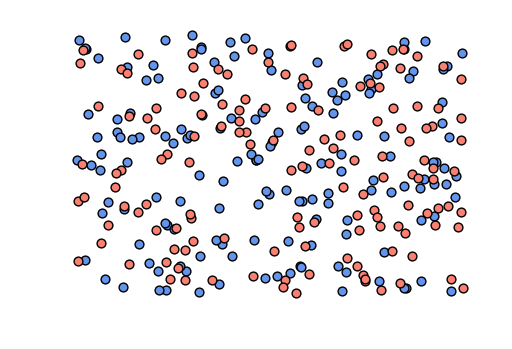

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# generate a toy classification dataset completely jumbled up
X = np.random.rand(300,2)
labels = np.sign(np.random.randn(300))
ind = np.argwhere(labels == 1)
ind = [s[0] for s in ind]
ind2 = np.argwhere(labels == -1)
ind2 = [s[0] for s in ind2]

# plot toy dataset
plt.scatter(X[ind,0],X[ind,1],color = 'cornflowerblue',s = 40,linewidth = 1,edgecolor = 'k')
plt.scatter(X[ind2,0],X[ind2,1],color = 'salmon',s = 40, linewidth = 1,edgecolor = 'k')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

# clean up plot
plt.axis('off')
plt.show()

This two-class toy dataset is completely random = there's no real pattern here.  No machine learning algorithm can perform well on this sort of dataset.

<a id='bib_cell'></a>

# Bibliiography and notes

[0] This dataset is a slightly cleaned up version of the one located here https://archive.ics.uci.edu/ml/datasets/Spambase

[1] The dataset is a cleaned and balanced subset of the original dataset available here

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Which was first introduced in the following paper.

Strack, Beata, et al. "[Impact of HbA1c measurement on hospital readmission rates: analysis of 70,000 clinical database patient records.](http://www.hindawi.com/journals/bmri/2014/781670/)" BioMed research international 2014 (2014).

[2] Watt, Jeremy et al. [Machine Learning Refined](www.mlrefined.com). Cambridge University Press, 2016